In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#TWEAKİNG THE MODEL
  * MODELE İNCE AYAR YAPARAK SONUÇLARA ETKİSİNİ İNCELEYECEZ

##1-iMPORTİNG LİBRARİES

In [2]:
#numpy and pandas
import pandas as pd
import numpy as np

#tensorflow- Tokenizer - pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##2-GET THE DATASET

In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

In [5]:
dataset = pd.read_csv('/tmp/sentiment.csv')

# cümleleri ve duygu belirten 0 ve 1 leri etiket olarak kayıt ediyoruz
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

##3-Create The Training And Test Sets

In [14]:
# Training set kısmına 0.8 , test setimiz 0.2 olsun
training_size = int(len(sentences)*0.8)

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

# Sonda kullanılmak üzere etiketleri numpy array olarak kayıt edelim
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



##4-Tokenize the Datasets


```
# İLK PARAMETRELERİMİZ BUNLARDI
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'

```



In [8]:
# PARAMETRELERİ DEĞİŞTİRELİM(vocab_size ve max_length)
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"



In [15]:
#Tokenize word and sentences
#İlk olarak instance oluşturup,parametreleri girerek dönüşümü sırayla yapalım

tokenizer = Tokenizer(num_words=vocab_size,oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)

# padding,truncate ... işlemlerini yapalım
training_padded = pad_sequences(training_sequences,maxlen = max_length,padding=padding_type,truncating=trunc_type)

# test setlerimizin token ve padding işlemlerini yapalım
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating = trunc_type)

##5-Train a Sentiment Model(With Tweaks)
  * Şimdi modelimizin diğer ince ayarını yapaarak model oluşturalım
  * Daha Önce Düzleştirme için Flatten() kullanıyorduk onun yerine GlobalAveragePooling1D kullanacaz

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Run the model fit
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 10ms/step - loss: 0.6921 - accuracy: 0.5330 - val_loss: 0.6961 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5229 - val_loss: 0.6990 - val_accuracy: 0.4135
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.5267 - val_loss: 0.6952 - val_accuracy: 0.4411
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.5549 - val_loss: 0.6892 - val_accuracy: 0.4862
Epoch 5/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6765 - accuracy: 0.5819 - val_loss: 0.6841 - val_accuracy: 0.5338
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6668 - accuracy: 0.6202 - val_loss: 0.6748 - val_accuracy: 0.5815
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6560 - val_loss: 0.6585 - val_accuracy: 0.6692
Epoch 8/30
50/50 [=

##6-Visualize the training graph

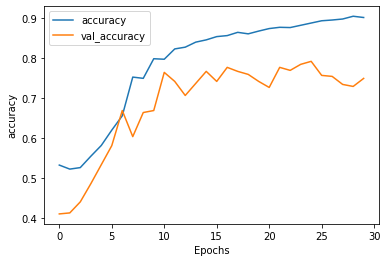

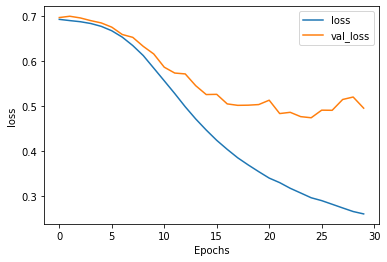

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

##7-Görselleştirmek için dosyaları indirme işlemi 
*   http://projector.tensorflow.org/

In [21]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [22]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

##8-Predicting Sentiment in New Reviews

In [23]:
example_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(example_reviews) 

#Diziyi ayarlayalım(cümle için)
padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(example_reviews)
sample_padded = pad_sequences(sample_sequences,maxlen = max_length,padding = padding_type)


classes = model.predict(sample_padded)

# Tahminleri görelim
for x in range(len(example_reviews)):
  print(example_reviews[x])
  print(classes[x])
  print("\n")


['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']
1/1 [==============================] - 0s 149ms/step
I love this phone
[0.90428483]


I hate spaghetti
[0.15322535]


Everything was cold
[0.58034414]


Everything was hot exactly as I wanted
[0.41137025]


Everything was green
[0.58034414]


the host seated us immediately
[0.5718277]


they gave us free chocolate cake
[0.84455264]


not sure about the wilted flowers on the table
[0.10554136]


only works when I stand on tippy toes
[0.8419316]


does not work when I stand on my head
[0.022245]


